In [3]:
# nye formler
# np.random.binomial(maks, sannsynlighet, antall tall)
# np.linspace(starttall, sluttall, antall tall i mellom)
# plt.plot(liste av tall, liste av like mange tall)
# np.linalg.norm(liste, orden)


In [4]:
import numpy as np
from qiskit.visualization import plot_histogram
samples = 100
p_1 = 0.2
data = np.random.binomial(1, p_1,(samples,))
print(data)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0]


In [5]:
frequency_of_zeros, frequency_of_ones = 0, 0
for x in data:
    if x:
        frequency_of_ones += 1/samples
    else:
        frequency_of_zeros += 1/samples
print(frequency_of_ones+frequency_of_zeros)

1.0000000000000004


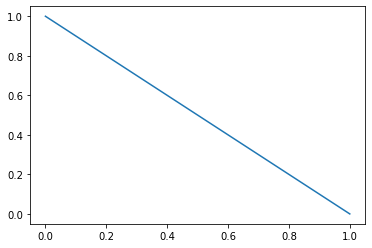

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
p_0 = np.linspace(0,1,100)
p_1 = 1-p_0
plt.plot(p_0,p_1)

In [7]:
p = np.array([[0.8], [0.2]])
np.linalg.norm(p, ord=1) # i ord = 1 plusser man tallene sammen. Med ord = 2 tar man kvadratroten av summen av kvadratene

1.0

In [8]:
n_0 = np.array([[1, 0], [0, 0]])
np.linalg.norm(n_0 @ p, ord=1)
n_0

array([[1, 0],
       [0, 0]])

In [9]:
n_1 = np.array([[0, 0], [0, 1]])
np.linalg.norm(n_1 @ p, ord=1)

0.2

In [10]:
p = np.array([[.5], [.5]])
M = np.array([[0.7, 0.6], [0.3, 0.4]])
np.linalg.norm(M @ p, ord=1)

0.9999999999999999

# Entropi

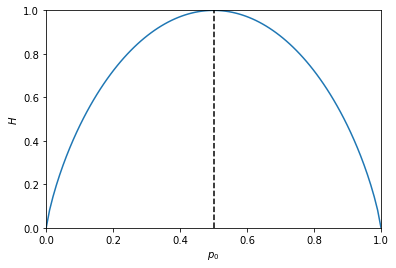

In [11]:
ϵ = 10e-10
p_0 = np.linspace(ϵ, 1-ϵ, 100)
p_1 = 1-p_0
H = -(p_0*np.log2(p_0) + p_1*np.log2(p_1))
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, -np.log2(0.5))
ax.set_xlabel("$p_0$")
ax.set_ylabel("$H$")
plt.plot(p_0, -(p_0*np.log2(p_0) + p_1*np.log2(p_1)))
plt.axvline(x=0.5, color='k', linestyle='--')

# kvantesannsynlighet

In [12]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
pi = np.pi

simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')
unitary_simulator = Aer.get_backend('unitary_simulator')

circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.ry(pi/2,0)
circuit.ry(pi/2,0)
#circuit.measure(0,0)

In [13]:
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

result = execute(circuit, backend = unitary_simulator).result()
print(result.get_unitary())

#result = execute(circuit, backend = statevector_simulator).result()
#statevector = result.get_statevector()
#plot_bloch_multivector(statevector)

[[-1.+1.2246468e-16j -0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j  1.+0.0000000e+00j]]


# Flere qubits

In [14]:
q0 = np.array([[1],[0]])
q1 = np.array([[1],[0]])
np.kron(q0,q1)

array([[1],
       [0],
       [0],
       [0]])